In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

dir = "/content/drive/MyDrive/Tugas_Akhir/dataset"

Mounted at /content/drive/


Total Files : 1398


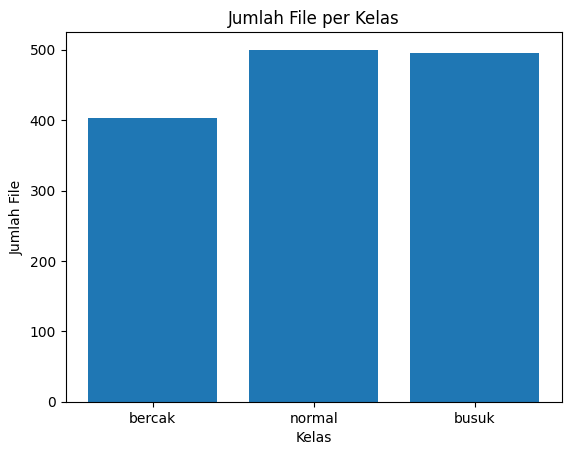

In [ ]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt
import os

label = {}
total_files = 0
for i in os.listdir(dir):
    counting = len(os.listdir(os.path.join(dir, i)))
    label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

plt.bar(label.keys(), label.values());
plt.title("Jumlah File per Kelas");
plt.xlabel('Kelas');
plt.ylabel('Jumlah File');

In [ ]:
import tensorflow as tf

data = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.3
)

In [ ]:
image_size = (200,200)
batch_size = 32
seed = 999

train_data = data.flow_from_directory(
    dir,
    class_mode='categorical',
    subset='training',
    target_size=image_size,
    batch_size=batch_size,
    seed=seed
)

valid_data = data.flow_from_directory(
    dir,
    class_mode='categorical',
    subset='validation',
    target_size=image_size,
    batch_size=batch_size,
    seed=seed
)

Found 980 images belonging to 3 classes.
Found 418 images belonging to 3 classes.


In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.Rescaling(1./255)
  ]
)



In [ ]:
augmentation = tf.keras.models.Sequential(data_augmentation)

# **Modeling**

Skenario 4 (optimizer adam, epoch : 10, learning rate : 0.001)

In [ ]:
base_model = tf.keras.applications.DenseNet201(include_top=False,
                                                        weights='imagenet',
                                                        input_shape=(image_size[0], image_size[1], 3),
                                                        pooling='max')
base_model.trainable=False
train_data.preprocessing_function = tf.keras.applications.densenet.preprocess_input

74836368/74836368 [==============================] - 1s 0us/step


In [ ]:
densenet_model = tf.keras.models.Sequential([
  data_augmentation,
  base_model,
  tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model_skenario_4 = densenet_model
densenet_model_4.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
  )

In [ ]:
model_hist_4 = densenet_model_4.fit(
    train_data,
    epochs=10,
    validation_data = valid_data
)

Epoch 1/10
31/31 [==============================] - 489s 15s/step - loss: 0.8309 - accuracy: 0.6694 - val_loss: 0.4076 - val_accuracy: 0.8397
Epoch 2/10
31/31 [==============================] - 265s 9s/step - loss: 0.3337 - accuracy: 0.8673 - val_loss: 0.3425 - val_accuracy: 0.8900
Epoch 3/10
31/31 [==============================] - 269s 9s/step - loss: 0.3358 - accuracy: 0.8796 - val_loss: 0.3010 - val_accuracy: 0.8995
Epoch 4/10
31/31 [==============================] - 260s 8s/step - loss: 0.2635 - accuracy: 0.9020 - val_loss: 0.2734 - val_accuracy: 0.9139
Epoch 5/10
31/31 [==============================] - 269s 9s/step - loss: 0.2354 - accuracy: 0.9102 - val_loss: 0.2681 - val_accuracy: 0.9115
Epoch 6/10
31/31 [==============================] - 267s 9s/step - loss: 0.2165 - accuracy: 0.9255 - val_loss: 0.2646 - val_accuracy: 0.8995
Epoch 7/10
31/31 [==============================] - 261s 8s/step - loss: 0.2170 - accuracy: 0.9194 - val_loss: 0.2935 - val_accuracy: 0.9043
Epoch 8/10
3

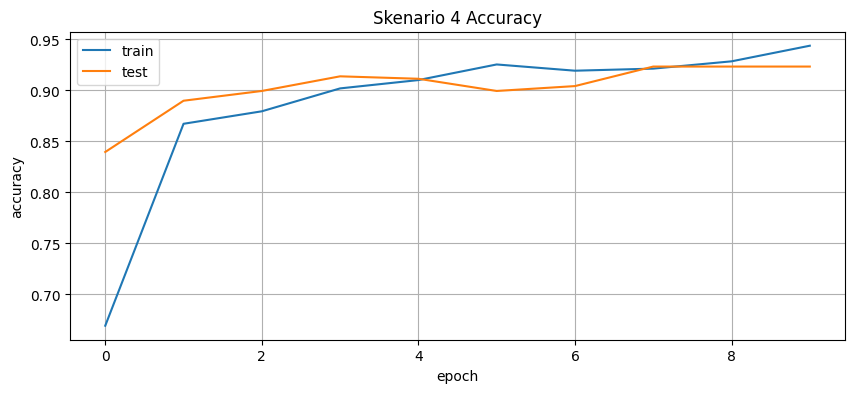

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(model_hist_4.history['accuracy'])
plt.plot(model_hist_4.history['val_accuracy'])
plt.title('Skenario 4 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

skenario 4 (optimizer : RMSprop, Epoch : 5, learning rate : 0.001)

In [ ]:
model_skenario_5 = tf.keras.models.Sequential([
  data_augmentation,
  base_model,
  tf.keras.layers.Dense(3, activation='softmax')
])

model_skenario_5 = densenet_model
model_skenario_5.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
  )

In [ ]:
model_hist_5 = model_skenario_5.fit(
    train_data,
    epochs=10,
    validation_data = valid_data
)

Epoch 1/10
31/31 [==============================] - 278s 9s/step - loss: 0.9649 - accuracy: 0.6541 - val_loss: 0.4613 - val_accuracy: 0.8301
Epoch 2/10
31/31 [==============================] - 263s 8s/step - loss: 0.4709 - accuracy: 0.8235 - val_loss: 0.4044 - val_accuracy: 0.8445
Epoch 3/10
31/31 [==============================] - 262s 8s/step - loss: 0.3589 - accuracy: 0.8551 - val_loss: 0.2862 - val_accuracy: 0.8900
Epoch 4/10
31/31 [==============================] - 264s 8s/step - loss: 0.3329 - accuracy: 0.8898 - val_loss: 0.3017 - val_accuracy: 0.8876
Epoch 5/10
31/31 [==============================] - 257s 8s/step - loss: 0.3100 - accuracy: 0.8827 - val_loss: 0.2318 - val_accuracy: 0.9282
Epoch 6/10
31/31 [==============================] - 266s 9s/step - loss: 0.2429 - accuracy: 0.9112 - val_loss: 0.2136 - val_accuracy: 0.9187
Epoch 7/10
31/31 [==============================] - 260s 8s/step - loss: 0.2368 - accuracy: 0.9041 - val_loss: 0.2040 - val_accuracy: 0.9306
Epoch 8/10
31

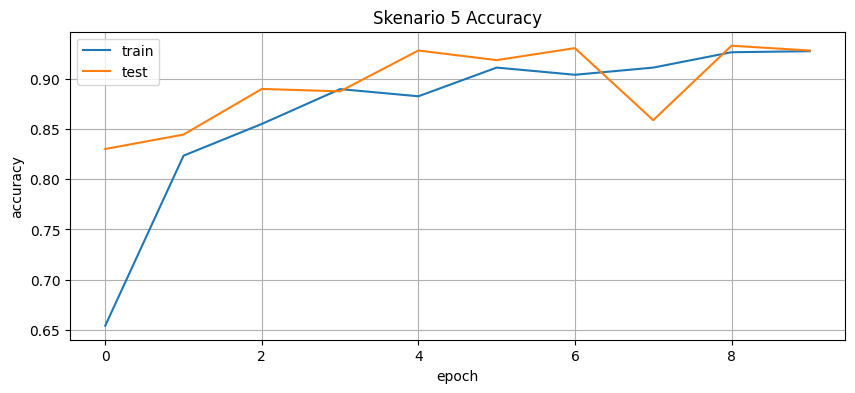

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(model_hist_5.history['accuracy'])
plt.plot(model_hist_5.history['val_accuracy'])
plt.title('Skenario 5 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

skenario 6 (optimizer : RMSprop, Epoch : 5, learning rate : 0.01)

In [ ]:
model_skenario_6 = tf.keras.models.Sequential([
  data_augmentation,
  base_model,
  tf.keras.layers.Dense(3, activation='softmax')
])

model_skenario_6 = densenet_model
model_skenario_6.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
  )

In [ ]:
model_hist_6 = model_skenario_6.fit(
    train_data,
    epochs=10,
    validation_data = valid_data
)

Epoch 1/10
31/31 [==============================] - 272s 9s/step - loss: 3.9270 - accuracy: 0.6388 - val_loss: 0.4488 - val_accuracy: 0.8995
Epoch 2/10
31/31 [==============================] - 257s 8s/step - loss: 0.4527 - accuracy: 0.8857 - val_loss: 0.9150 - val_accuracy: 0.8134
Epoch 3/10
31/31 [==============================] - 263s 8s/step - loss: 0.4843 - accuracy: 0.8796 - val_loss: 0.5965 - val_accuracy: 0.8780
Epoch 4/10
31/31 [==============================] - 256s 8s/step - loss: 0.4122 - accuracy: 0.8898 - val_loss: 1.3043 - val_accuracy: 0.7344
Epoch 5/10
31/31 [==============================] - 261s 8s/step - loss: 0.7173 - accuracy: 0.8796 - val_loss: 0.4051 - val_accuracy: 0.9187
Epoch 6/10
31/31 [==============================] - 263s 8s/step - loss: 0.2895 - accuracy: 0.9214 - val_loss: 0.2847 - val_accuracy: 0.9402
Epoch 7/10
31/31 [==============================] - 263s 8s/step - loss: 0.4224 - accuracy: 0.9000 - val_loss: 0.3804 - val_accuracy: 0.9211
Epoch 8/10
31

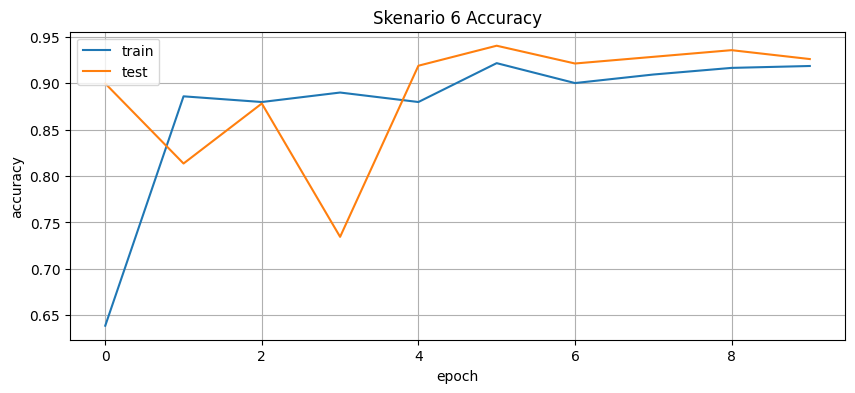

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(model_hist_6.history['accuracy'])
plt.plot(model_hist_6.history['val_accuracy'])
plt.title('Skenario 6 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()